# Logistic Regression with the Titanic Survival Dataset
**Date:** January 25, 2025  
**Author:** Dario Piga  

In this notebook, we will implement a logistic regression model using `pytorch` to predict survival on the Titanic. Our goal is to understand how various factors such as passenger class, gender, age, and fare contribute to the likelihood of survival. By applying logistic regression, we will model these relationships to predict binary outcomes, specifically, whether a passenger survived or not.

## The Titanic Survival Dataset

The Titanic dataset is a historical dataset that contains data on the passengers aboard the RMS Titanic, which famously sank on its maiden voyage in 1912. This dataset includes the following features:

- `survived`: Survival (0 = No, 1 = Yes)
- `pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- `sex`: Gender (male or female)
- `age`: Age in years
- `fare`: Passenger fare
- and others not used in this exercise
  
We will explore the data, perform necessary preprocessing steps, and build a logistic regression model to predict whether a passenger survived based on their features. We will also evaluate our model's performance using various metrics to understand its effectiveness.


In [1]:
import seaborn as sns
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn as nn

In [2]:
# Load dataset
df = sns.load_dataset('titanic')

# Select specific columns
features = ['pclass', 'sex', 'age', 'fare']
df = df[features + ['survived']]

# Drop rows with any NaN values
df.dropna(inplace=True)

# Print the DataFrame
print(df)

     pclass     sex   age     fare  survived
0         3    male  22.0   7.2500         0
1         1  female  38.0  71.2833         1
2         3  female  26.0   7.9250         1
3         1  female  35.0  53.1000         1
4         3    male  35.0   8.0500         0
..      ...     ...   ...      ...       ...
885       3  female  39.0  29.1250         0
886       2    male  27.0  13.0000         0
887       1  female  19.0  30.0000         1
889       1    male  26.0  30.0000         1
890       3    male  32.0   7.7500         0

[714 rows x 5 columns]


In [3]:
# Convert gender into binary variable (0 or 1)
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
# Selecting specific features
X = df[features]
y = df['survived']


In [4]:
# Plot your data (TBD)
...

p(survived=1 | geneder=male): 0.2052980132450331
p(survived=1 | geneder=female): 0.7547892720306514


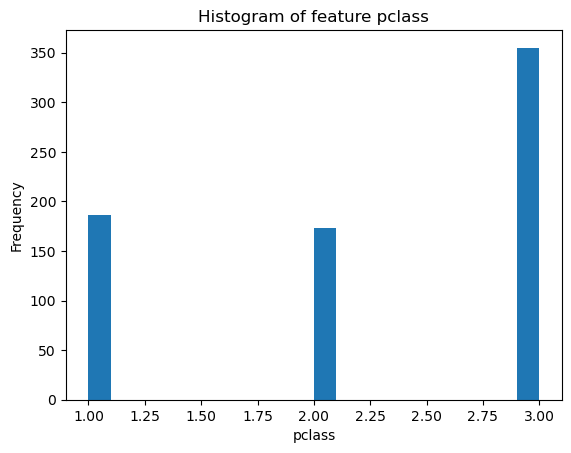

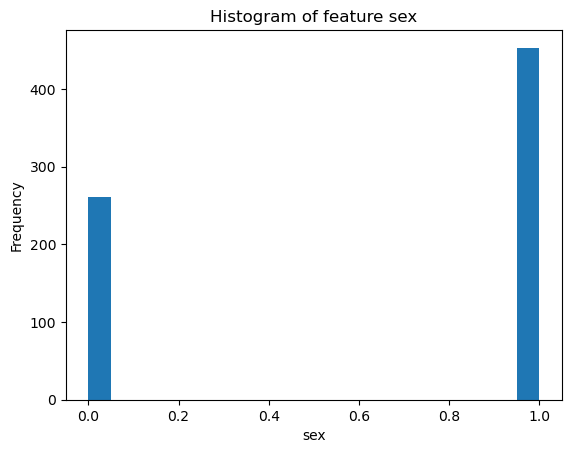

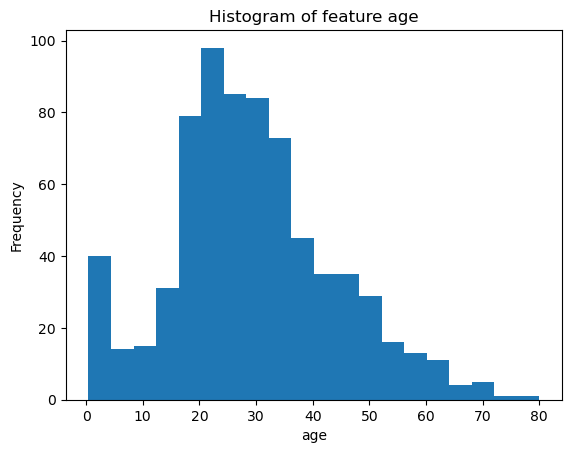

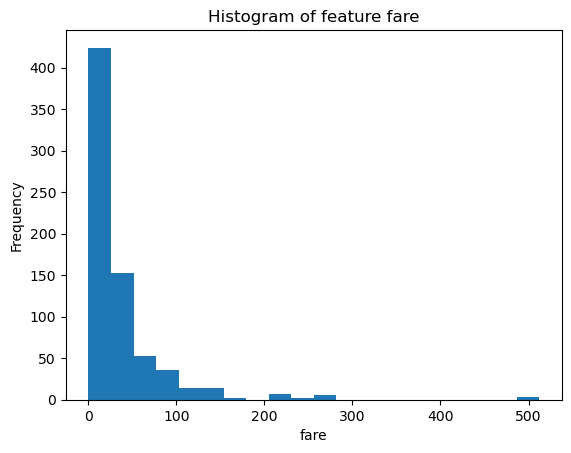

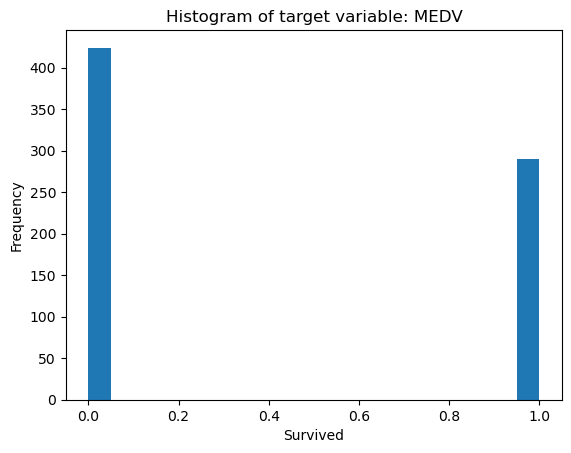

In [5]:
# Plot your data (solution)

for f in features:
    plt.figure()
    plt.hist(df[f], bins = 20)
    plt.title(f'Histogram of feature {f}')
    plt.xlabel(f)
    plt.ylabel('Frequency')


plt.figure()
plt.hist(y, bins = 20)
plt.title(f"Histogram of target variable: MEDV")
plt.xlabel('Survived')
plt.ylabel('Frequency')


# compute conditional empirical distributions (p(y=1|gender = male))
index_men = df['sex'] == 1
number_of_men = sum(index_men)
number_of_survided_men = sum(df.loc[index_men]['survived']==1)
ratio_survided_men = number_of_survided_men/number_of_men
print(f"p(survived=1 | geneder=male): {ratio_survided_men}")

# compute conditional empirical distributions (p(y=1|gender = male))
index_female = df['sex'] == 0
number_of_female = sum(index_female)
number_of_survided_female = sum(df.loc[index_female]['survived']==1)
ratio_survided_female = number_of_survided_female/number_of_female
print(f"p(survived=1 | geneder=female): {ratio_survided_female}")

In [6]:
# Splitting the dataset into training and testing sets and normalize (TBD)
...

In [7]:
# Splitting the dataset into training and testing sets and normalize (solution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features and output to have zero mean and unitary std

# Normalize training and test dataset. Note that training and test datasets are normalized using the same mean and std 
X_mean = X_train.mean(axis = 0)
X_std = X_train.std(axis = 0)
X_train = (X_train - X_mean)/X_std 
X_test = (X_test - X_mean)/X_std


# sanity check:
print(f"Training features: \n Mean:\n {X_train.mean(axis = 0)} \n Std:\n {X_train.std(axis = 0)}\n")
print(f"Training target: \n Mean:\n {y_train.mean():.2f} \n Std:\n {y_train.std():.2f}")


Training features: 
 Mean:
 pclass    8.088490e-17
sex       2.799862e-17
age       2.488766e-16
fare      5.288628e-17
dtype: float64 
 Std:
 pclass    1.0
sex       1.0
age       1.0
fare      1.0
dtype: float64

Training target: 
 Mean:
 0.41 
 Std:
 0.49


In [18]:
# Convert datasets to tensors

X_train_tensor = torch.tensor(X_train.values, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32)

In [9]:
# Create logistic regression model in Pytorch (TBD)
...

In [10]:
# Define model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear layer
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Applying the linear layer and then the sigmoid function
        outputs = self.sigmoid(self.linear(x))
        return outputs

model = LogisticRegressionModel(input_dim = X.shape[1])

print(f"Model structure: {model}")

for name, params in model.named_parameters():
    print(f"parameter name: {name}. Value {params.data}")

# check what model provides:
y_hat = model(X_train_tensor)
y_hat.shape

Model structure: LogisticRegressionModel(
  (linear): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
parameter name: linear.weight. Value tensor([[ 0.1950, -0.3596, -0.4937, -0.2317]])
parameter name: linear.bias. Value tensor([-0.1493])


torch.Size([571, 1])

In [11]:
# Define the loss function for binary classification
criterion = nn.BCELoss() # Binary cross entropy

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [12]:
# training loop (TBD)
...

In [13]:
# training loop (solution)
max_epochs = 1000
for it in range(max_epochs):
    optimizer.zero_grad()
    y_hat = model(X_train_tensor)
    loss = criterion(y_hat, y_train_tensor.view(-1,1))
    loss.backward()
    optimizer.step()
    if it % 5 == 0:
        print(f"Iteration: {it}. Loss: {loss.item() :3f}")
    

Iteration: 0. Loss: 0.684871
Iteration: 5. Loss: 0.676950
Iteration: 10. Loss: 0.669314
Iteration: 15. Loss: 0.661955
Iteration: 20. Loss: 0.654864
Iteration: 25. Loss: 0.648033
Iteration: 30. Loss: 0.641454
Iteration: 35. Loss: 0.635118
Iteration: 40. Loss: 0.629018
Iteration: 45. Loss: 0.623146
Iteration: 50. Loss: 0.617493
Iteration: 55. Loss: 0.612052
Iteration: 60. Loss: 0.606815
Iteration: 65. Loss: 0.601775
Iteration: 70. Loss: 0.596924
Iteration: 75. Loss: 0.592256
Iteration: 80. Loss: 0.587763
Iteration: 85. Loss: 0.583438
Iteration: 90. Loss: 0.579275
Iteration: 95. Loss: 0.575268
Iteration: 100. Loss: 0.571411
Iteration: 105. Loss: 0.567696
Iteration: 110. Loss: 0.564120
Iteration: 115. Loss: 0.560675
Iteration: 120. Loss: 0.557358
Iteration: 125. Loss: 0.554162
Iteration: 130. Loss: 0.551082
Iteration: 135. Loss: 0.548114
Iteration: 140. Loss: 0.545254
Iteration: 145. Loss: 0.542496
Iteration: 150. Loss: 0.539837
Iteration: 155. Loss: 0.537273
Iteration: 160. Loss: 0.534799

In [14]:
for name, p in model.named_parameters():
    print(f"Parameter {name}. Value: {p}")

Parameter linear.weight. Value: Parameter containing:
tensor([[-0.6427, -1.0690, -0.4162,  0.2066]], requires_grad=True)
Parameter linear.bias. Value: Parameter containing:
tensor([-0.3898], requires_grad=True)


In [15]:
# assess performance (TBD)

def assess_results(model, X, y, data_type):
    with torch.no_grad():
        

        # Compute accuracy
        ...

        # Compute confusion matrix
        
        TP = ...  # True Positive
        TN = ...  # True Negative
        FP = ...  # False Positive
        FN = ...  # False Negative

        # Print confusion matrix results
        print(f"Accuracy: {accuracy*100:.3f} % ")
        print(f"Confusion Matrix for {data_type} Data:")
        print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
        


In [16]:
# assess performance (solution)

import matplotlib.pyplot as plt

def assess_results(model, X, y, data_type):
    with torch.no_grad():
        p_hat = model(X).squeeze()  # Get the predicted probabilities
        y_hat = (p_hat > 0.5).float()  # Convert probabilities to 0 or 1 based on threshold

        # Prediction and plotting
        plt.figure(figsize=(5, 5))
        plt.scatter(p_hat.numpy(), y.numpy(), alpha=0.5)  # Use scatter plot for clarity
        plt.title(f'Predicted vs. True - {data_type} Data')
        plt.xlabel('Estimated Probability ($\hat{p}$)')
        plt.ylabel('True Output')
        plt.grid(True)
        plt.show()

        # Compute accuracy
        accuracy = torch.mean((y_hat == y).float()).item()  # Convert boolean to float and calculate mean

        # Compute confusion matrix
        TP = torch.sum((y_hat == 1) & (y == 1)).item()  # True Positive
        TN = torch.sum((y_hat == 0) & (y == 0)).item()  # True Negative
        FP = torch.sum((y_hat == 1) & (y == 0)).item()  # False Positive
        FN = torch.sum((y_hat == 0) & (y == 1)).item()  # False Negative

        # Print confusion matrix results
        print(f"Accuracy: {accuracy*100:.3f} % ")
        print(f"Confusion Matrix for {data_type} Data:")
        print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
        


Training results


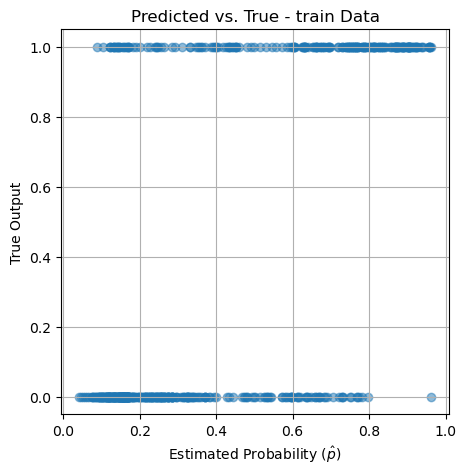

Accuracy: 79.510 % 
Confusion Matrix for train Data:
TP: 167, TN: 287, FP: 50, FN: 67
Test results


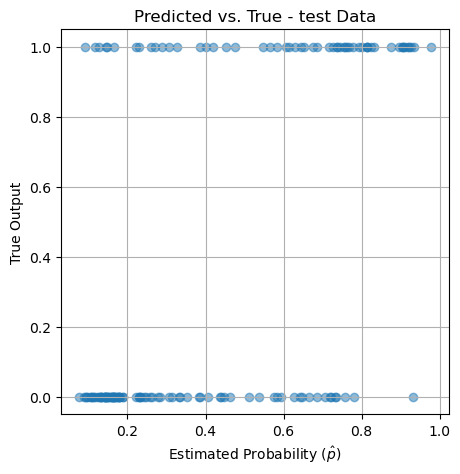

Accuracy: 74.825 % 
Confusion Matrix for test Data:
TP: 38, TN: 69, FP: 18, FN: 18


In [17]:
# Assess results in training
print('Training results')

assess_results(model, X_train_tensor, y_train_tensor, data_type = 'train')
#print(f"rmse = {rmse}. R2 = {R2:.3f}")


# Assess results in test
print('Test results')

assess_results(model, X_test_tensor, y_test_tensor, data_type = 'test')
#print(f"rmse = {rmse}. R2 = {R2:.3f}")
